# HW2_MachineLearning
## Aminmohammad Soleymani Abyaneh --------------------------------------------------------- 94100805

## 1. MLE for binomial distribution
In this problem we must find the maximum likelihood estimation for binomial distribution and finde out whether it is biased or unbiased estimation.

### 1. Part A

<img src="1mle.png",width=600,height=600, align="left">
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<br><br>

### 1. Part B
<img src="2mle.png",width=350,height=350, align="left">
To prove MLE as a biased estimator we have:
<br><br>
$$E (\hat{p}) = E (n^{-1}.\bar{y}) = n^{-1} . E (\bar{y}) = n^{-1} . n . p = p$$
<br>So this is a biased estimation.
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### 1. Part C


## 3. Overfitting in logistic regression

In this section we are trying to reduce the effect of adverse overfitting condition. We plot the sigmoid function for w = 1, 50, 100.
The funciton we are going to plot is: $$f(x) = \frac{1}{(1 + e^{-wx})}$$ 
First we have imports which are neccessary.

In [15]:
# plotting graphs
import matplotlib.pyplot as plt
# numerical and algebra calculation
import numpy as np
# mathematics like sqrt
import math
# using random numbers
import random

To plot a sigmoid function, We need to write a function to return y value for each x input. Create an array named x between -10 to 10 with an interval of 0.2, then pass the array x into sigmoid() which returns an array with corresponding values. And finally plot the result.


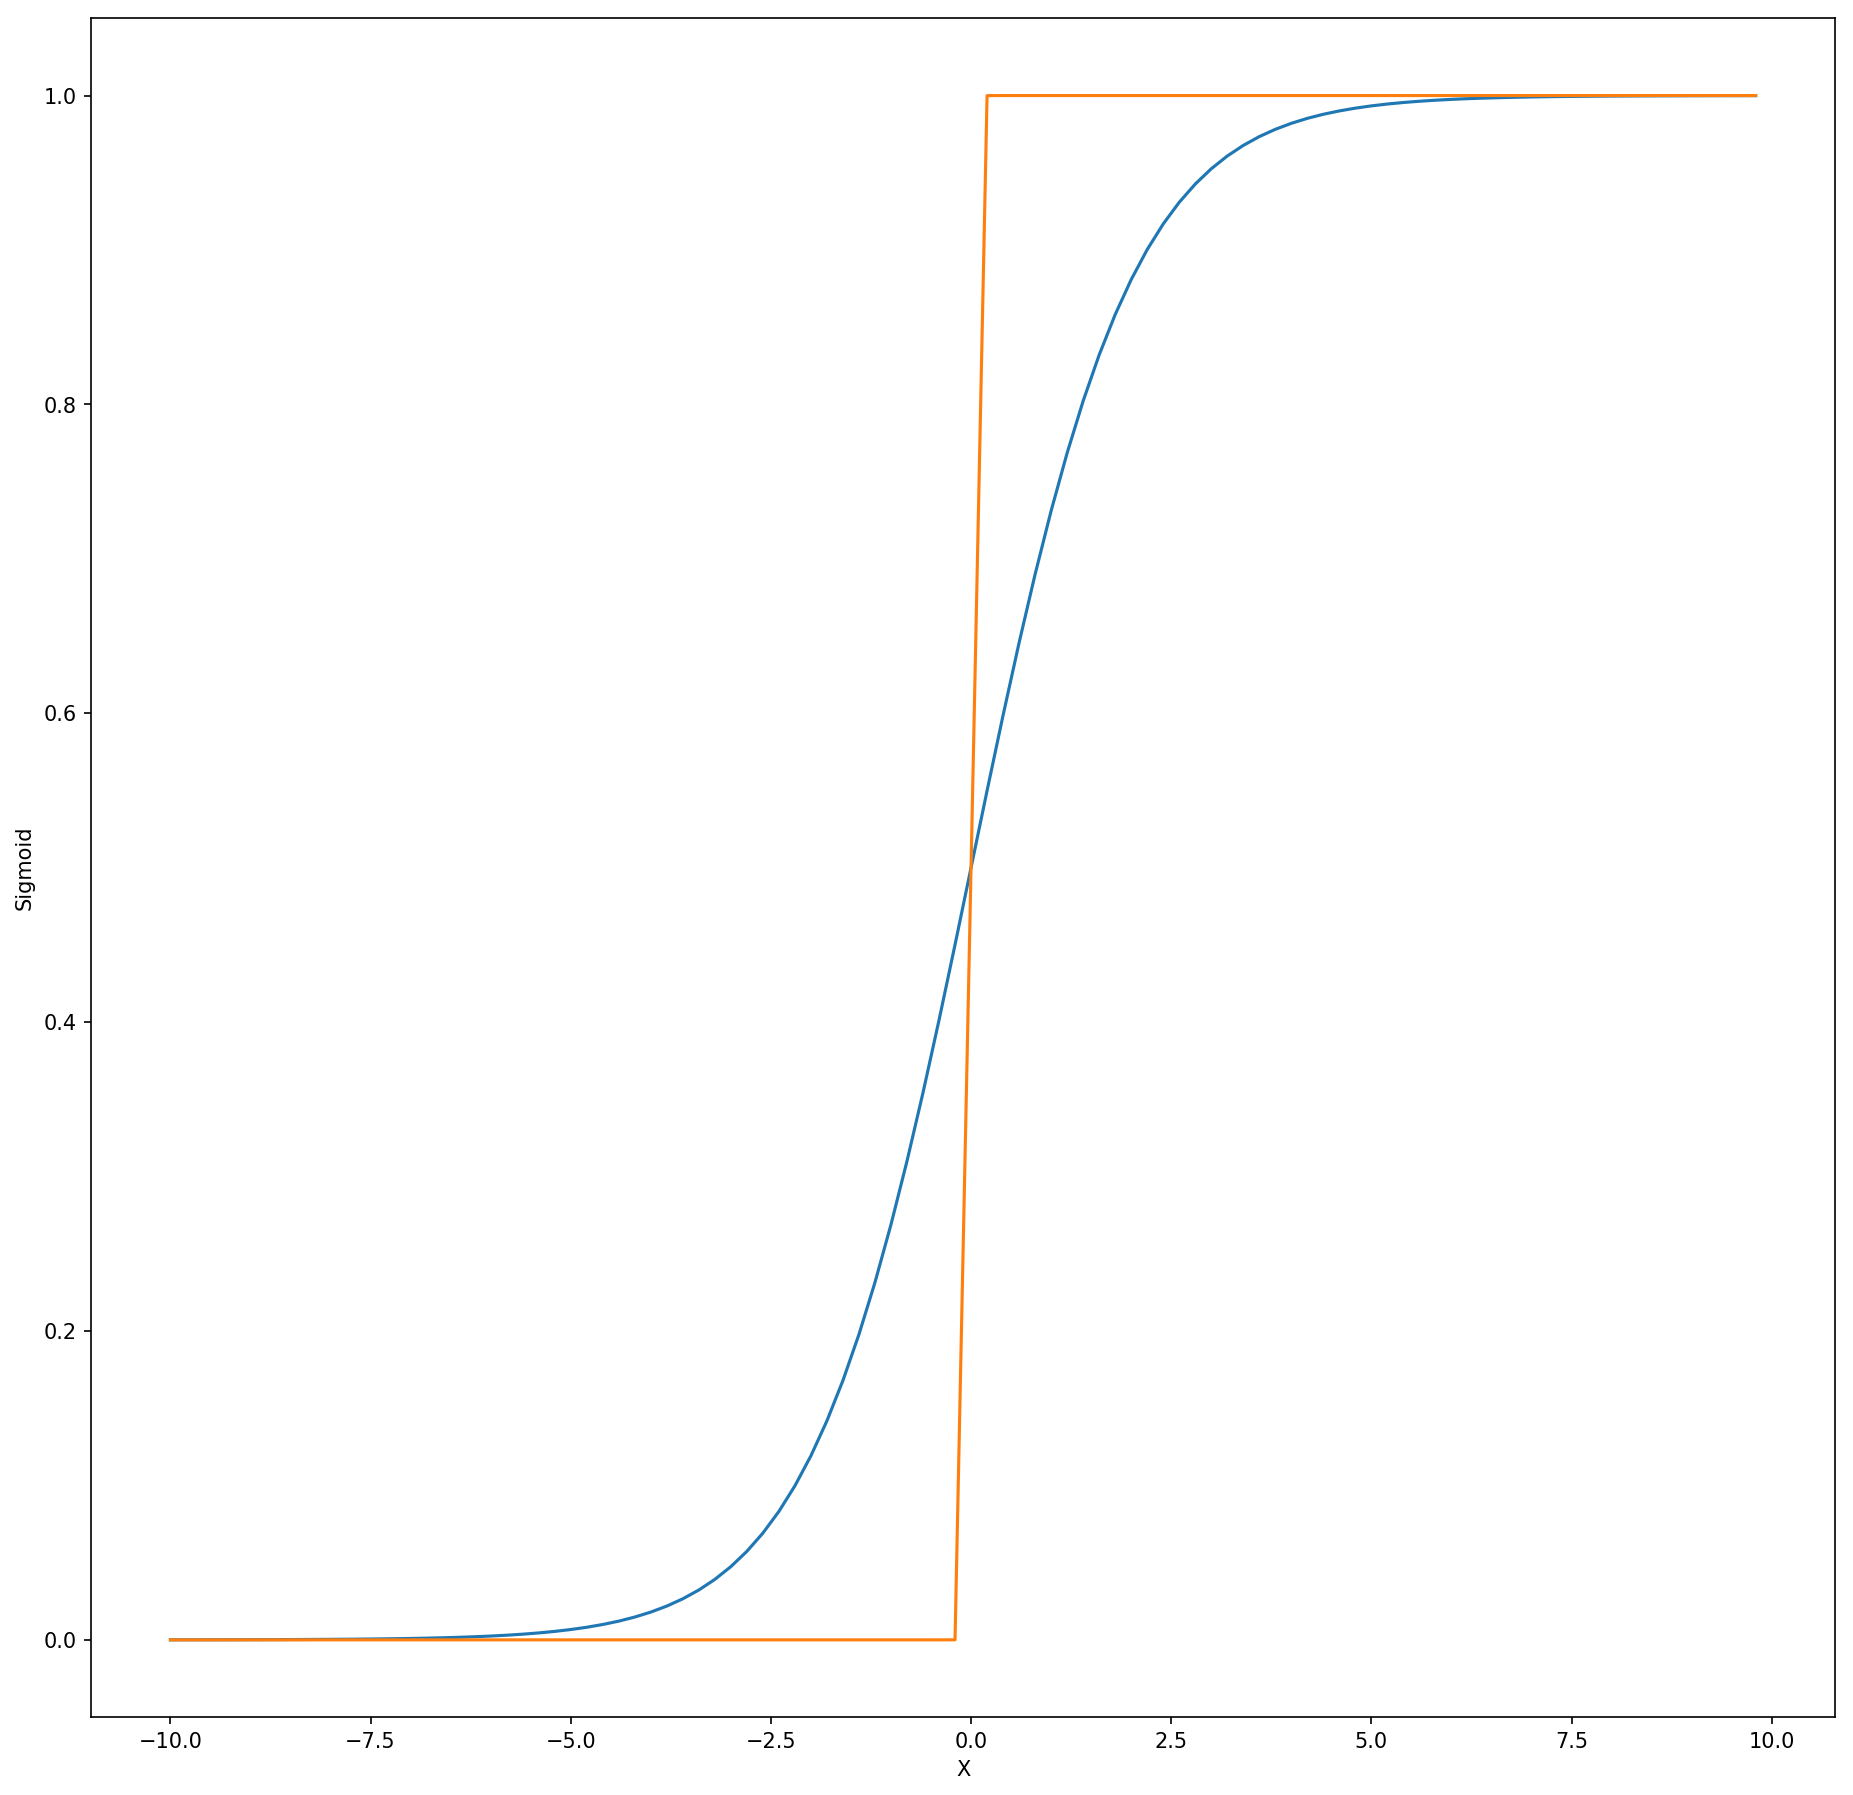

In [137]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

# prepare the data
x = np.array(np.arange(-10., 10., 0.2))
sig_1 = sigmoid(x)
sig_50 = sigmoid(np.multiply(x, 50))

# Overflow accures with 100, result is almost no different from 50.
# sig_100 = sigmoid(np.multiply(x, 100))

# plot the result
plt.figure(figsize=(15, 15), dpi=150)
plt.plot(x,sig_1)
plt.plot(x,sig_50)

# plt.plot(x,sig_100)

plt.ylabel('Sigmoid')
plt.xlabel('X')
plt.show()

Due to previous graphs, overfitting accures in large w because the curves is loosing its smoothness and going toward a 0 and 1 splitter which would definitly cause overfitting since small amoints of error would cause massive change in output value from 0 to 1 and vise versa.


## 4. Implementation of KNN algorithm
Closest neighbor classifiers depend on learning by
relationship, that is, by contrasting a given test tuple and
preparing tuples that are like it. The preparation tuples are
depicted by n traits. Each tuple speaks to a point in a ndimensional space. Thusly, all the preparation tuples are put
away in a n-dimensional example space. At the point when
given an obscure tuple, a k-closest neighbor classifier looks
the example space for the k preparing tuples that are nearest to
the obscure tuple. These k preparing tuples are the k "closest
neighbors" of the obscure tuple. 

In this section first we try to produce data using guassian distribution and numpy. Then we try using KNN with different parameters on the train and test data. In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

Shape of data: (6000, 3)
Shape of label: (6000, 1)


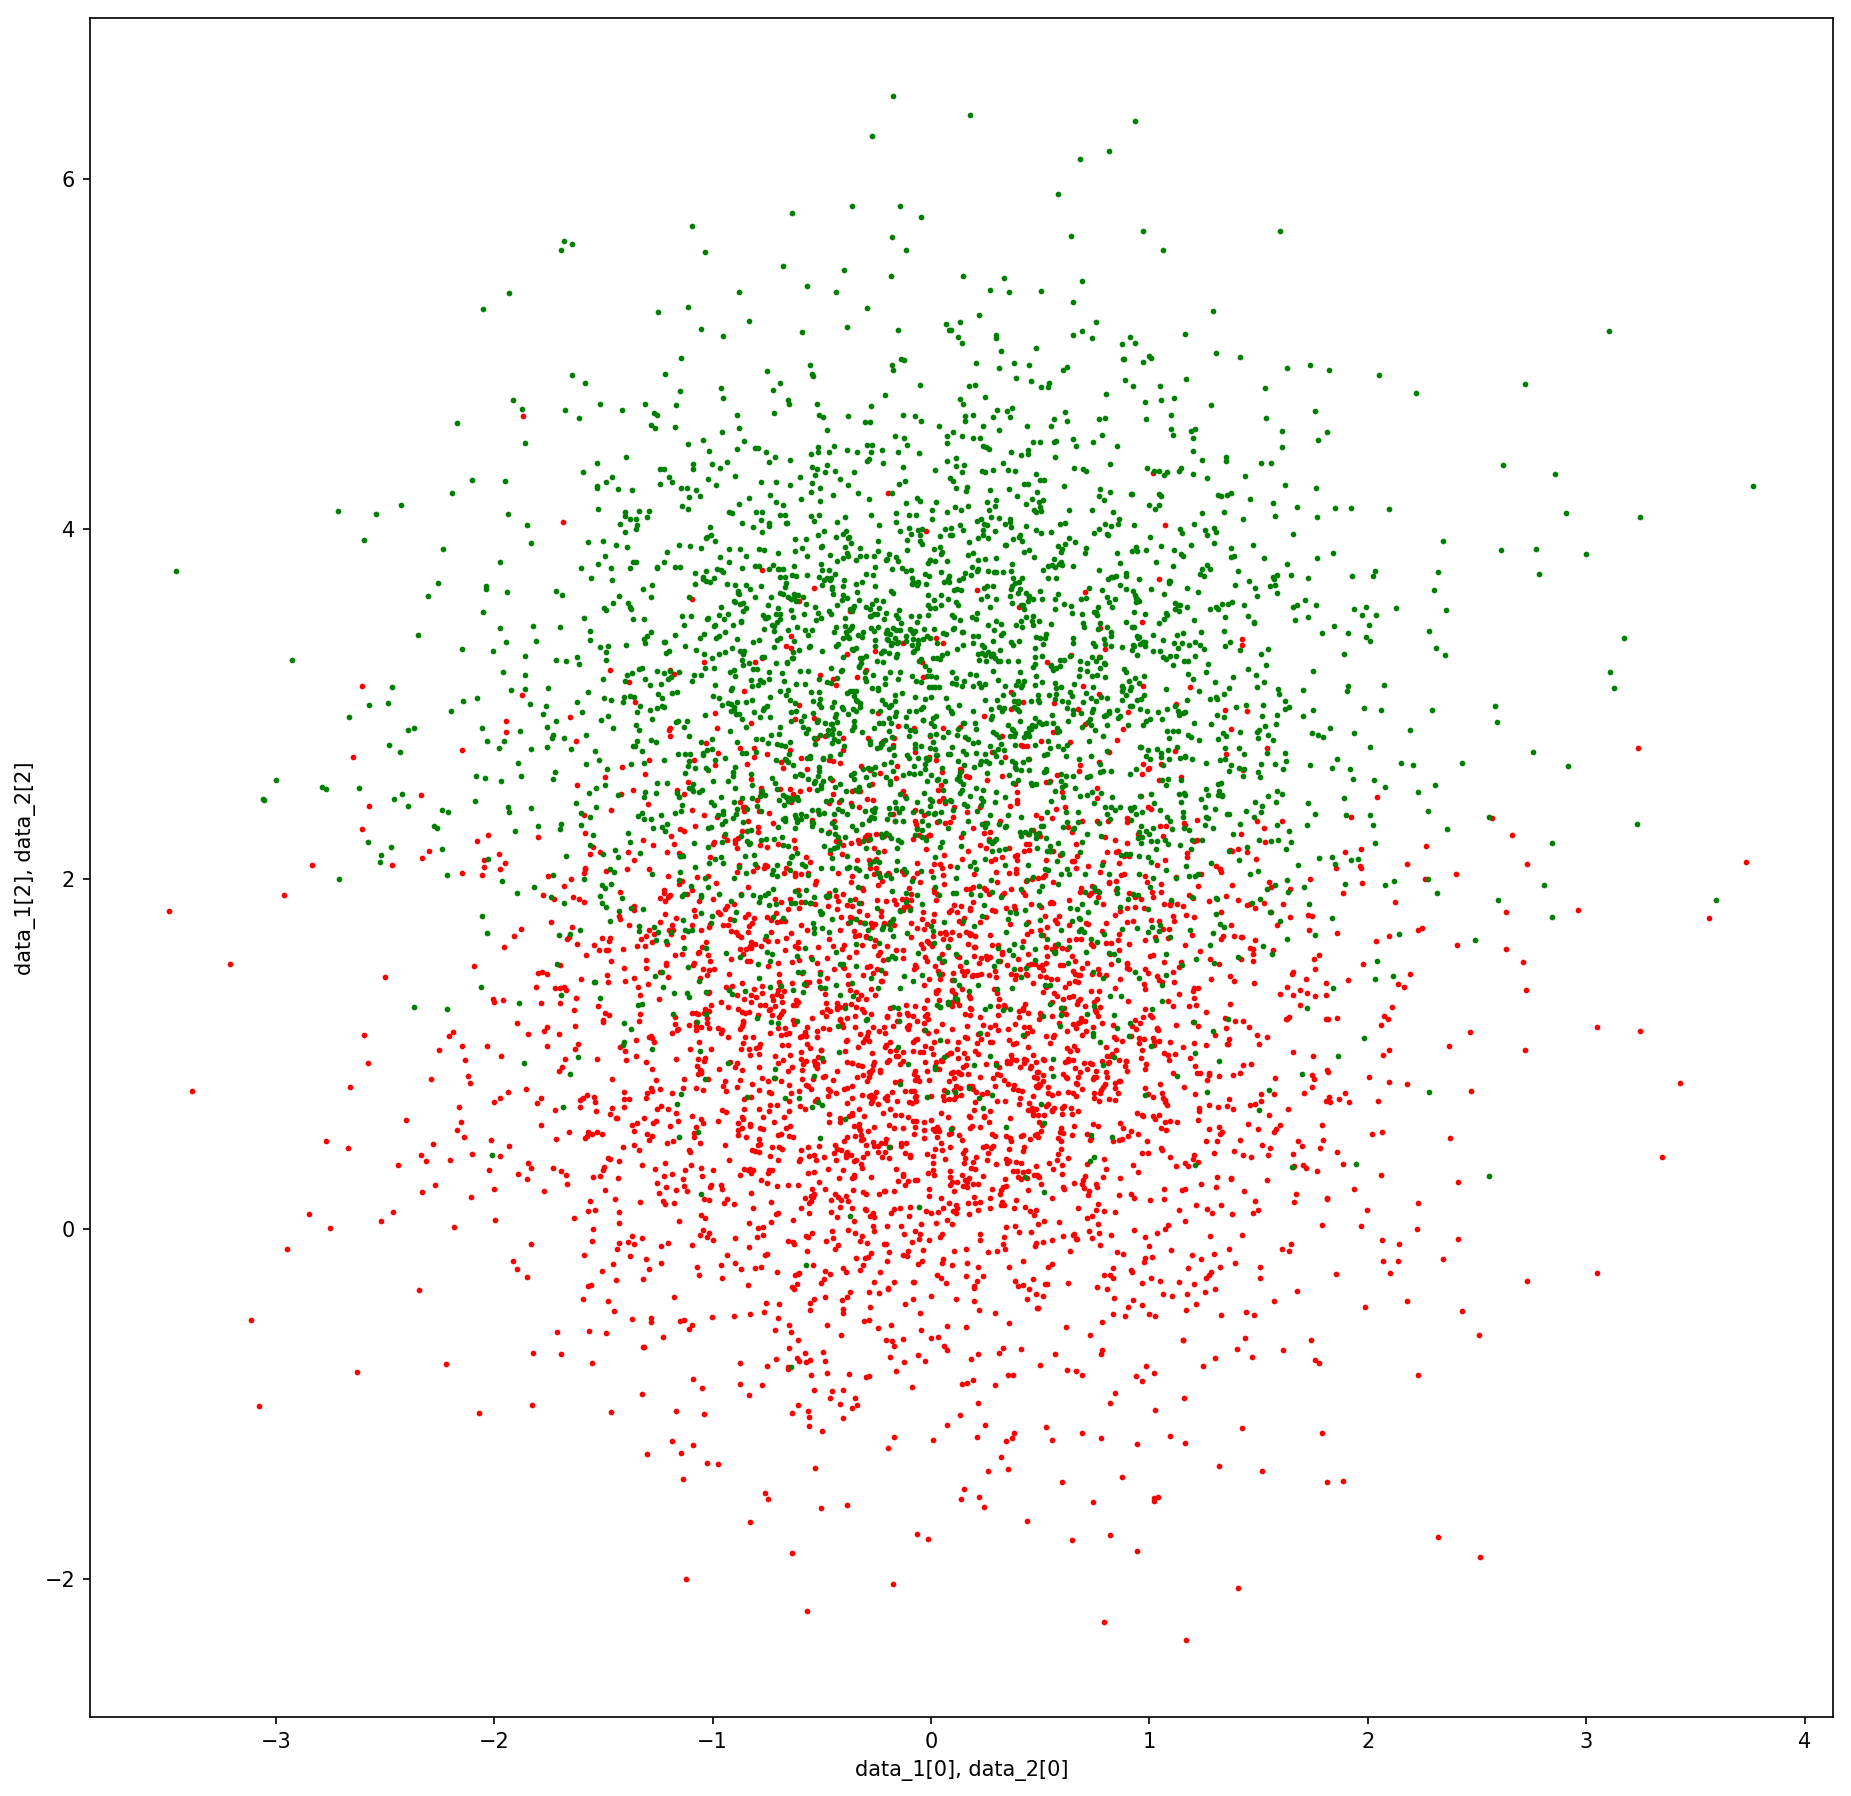

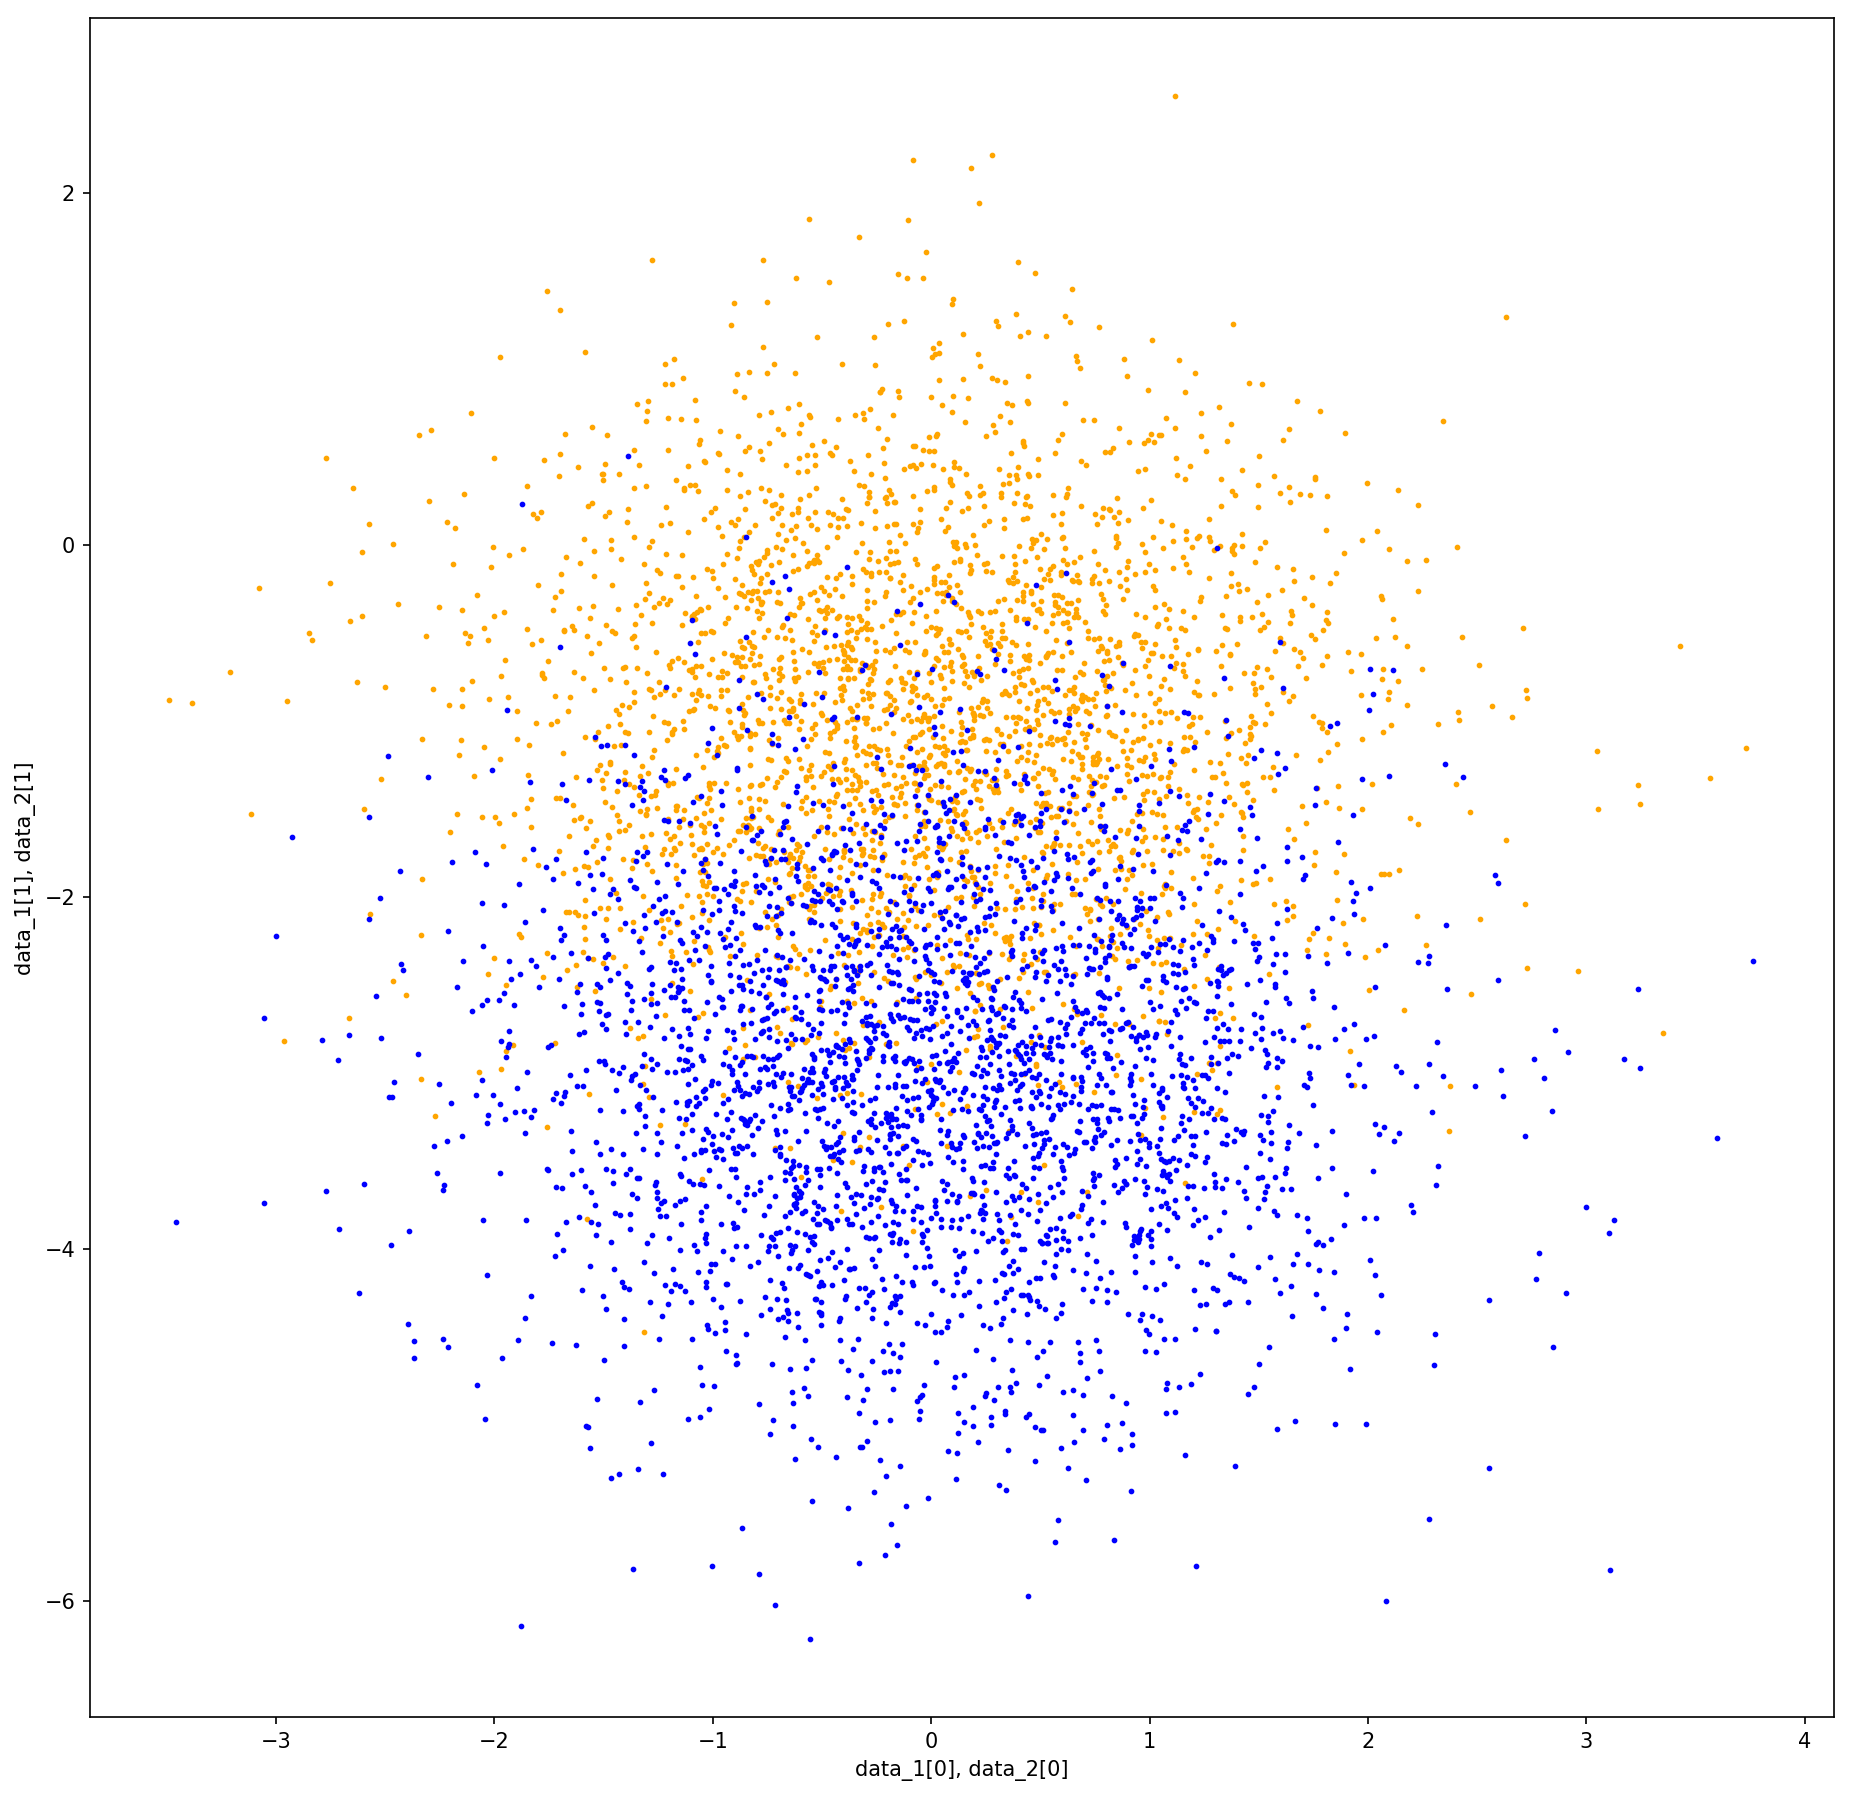

In [138]:
u_1 = np.array([0, -1, 1])
u_2 = np.array([0, -3, 3])

E_1 = [[1, 0, 0],[0, 1, 0], [0, 0, 1]]
E_2 = [[1, 0, 0],[0, 1, 0], [0, 0, 1]]

# generate samples with equal 0.5 probability
data_1 = np.random.multivariate_normal(u_1, E_1, 3000)
data_2 = np.random.multivariate_normal(u_2, E_2, 3000)

# merge the samples
data = np.concatenate([data_1, data_2], axis=0)
label = np.concatenate([np.full((3000, 1), 1), np.full((3000, 1), 2)], axis=0) 

print('Shape of data:', data.shape)
print('Shape of label:', label.shape)

# plotting data
plt.figure(figsize=(15, 15), dpi=150)
plt.scatter(data_1[:, 0], data_1[:, 2], color='red', s=3)
plt.scatter(data_2[:, 0], data_2[:, 2], color='green', s=3)
plt.xlabel('data_1[0], data_2[0]')
plt.ylabel('data_1[2], data_2[2]')
plt.show()

plt.figure(figsize=(15, 15), dpi=150)
plt.scatter(data_1[:, 0], data_1[:, 1], color='orange', s=3)
plt.scatter(data_2[:, 0], data_2[:, 1], color='blue', s=3)
plt.xlabel('data_1[0], data_2[0]')
plt.ylabel('data_1[1], data_2[1]')
plt.show()

Now we consider choosing 10000 samples for our test data. A good way may be to create a shuffle random index from our train data so we may use them as test. Another option is to generate a 10000 more samples.

In [139]:
# generate samples with equal 0.5 probability
data_1_t = np.random.multivariate_normal(u_1, E_1, 500)
data_2_t = np.random.multivariate_normal(u_2, E_2, 500)

# merge the samples
data_t = np.concatenate([data_1_t, data_2_t], axis=0)
label_t = np.concatenate([np.full((500, 1), 1), np.full((500, 1), 2)], axis=0)
print('Shape of test data :', data_t.shape)
print('Shape of test label:', data_t.shape)

Shape of test data : (1000, 3)
Shape of test label: (1000, 3)


We need two key functions to complete KNN algorithm. Distance would calculate the distance using sqrt function and numpy. x_1 and x_2 are two inputs and the output is the distance between these two vectors. calling distance function on all train data would categorically give us the KNN. Testing the function using the first subject in data and test is necessary to check the accuracy.

In [140]:
def distance(x1, x2):
    return np.sqrt(((x1-x2)**2).sum())

import sys
print('Train data:', data[0], '\nTest data :', data_t[0])
print('Distance 0 is:', distance(data[0], data_t[0]), file=sys.stderr)
print('Train data:', data[1], '\nTest data :', data_t[1])
print('Distance 1 is:', distance(data[1], data_t[1]), file=sys.stderr)
print('Train data:', data[2], '\nTest data :', data_t[2])
print('Distance 2 is:', distance(data[2], data_t[2]), file=sys.stderr)
print('Train data:', data[3], '\nTest data :', data_t[3])
print('Distance 3 is:', distance(data[3], data_t[3]), file=sys.stderr)

Train data: [-1.63693168 -1.56155718  0.06369167] 
Test data : [-0.51622174 -0.91407214  0.80209319]
Train data: [ 0.43004199 -0.09144113  0.12687258] 
Test data : [-0.82810065 -1.52151135 -0.39017391]
Train data: [-0.24929272 -1.15989756  1.8819721 ] 
Test data : [ 0.16530031 -2.1328789   0.50972827]
Train data: [-0.48432917 -0.41871523 -0.75341179] 
Test data : [ 0.58286439 -1.20750817  0.09087064]


Distance 0 is: 1.4901222988727805
Distance 1 is: 1.9736668487314393
Distance 2 is: 1.7325222033965115
Distance 3 is: 1.5728665573308644


Next function we are going to use is **knn**. This would give us the classification of test data with respect to train data. The sequence of classification is  like the following.
    * Extract the size of train data
    * Calculate distance of test vector to each of training vectors
    * Sort the aquiered distances
    * Perform a frequency count
    * Return the most frequent class
 
As it can be seen in the result of printing sorted_labels **most of the nearest naighbors are from class 1**. So the decision will be class 1.

In [141]:
def knn(test, train, label, k, pr=False):
    # finding number of trains
    m = train.shape[0]

    # compute distance from each point and store in dist
    dist = []
    for i in range(m):
        dist.append(distance(test, train[i]))
    
    dist = np.asarray(dist)
    indx = np.argsort(dist)

    sorted_labels = label[indx][:k]
    if (pr):
        print('Sort labels for k=30 and data_t = data[60]\n', sorted_labels)
    counts = np.unique(sorted_labels, return_counts=True)
    return counts[0][np.argmax(counts[1])]

knn(data_t[60], data, label, 30, pr=True)

Sort labels for k=30 and data_t = data[60]
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


1

After making sure about correctness of **knn**, we create a loop over entire test cases and gather all the results into an array of prediction. we call this array **predict**.


In [142]:
predict = []
temp = []

kvalues = range(1, 11)
predict.clear()

for k in kvalues:
    temp.clear()
    for t in data_t:
        temp.append(knn(t, data, label, k))
    print('kvalue', k, 'knn calculated')
    predict.append(np.asarray(temp))

import sys
print('Prediction len:', predict.__len__(), file=sys.stderr)
print('KNN actual len:', predict[0].__len__(), file=sys.stderr)

kvalue 1 knn calculated
kvalue 2 knn calculated
kvalue 3 knn calculated
kvalue 4 knn calculated
kvalue 5 knn calculated
kvalue 6 knn calculated
kvalue 7 knn calculated
kvalue 8 knn calculated
kvalue 9 knn calculated
kvalue 10 knn calculated


Prediction len: 10
KNN actual len: 1000


Calculation of error for each of the k values from 1 to 10 is performed in next section.


Error for k = 1  is 0.109
Error for k = 2  is 0.123
Error for k = 3  is 0.096
Error for k = 4  is 0.106
Error for k = 5  is 0.091
Error for k = 6  is 0.097
Error for k = 7  is 0.095
Error for k = 8  is 0.093
Error for k = 9  is 0.085
Error for k = 10  is 0.086


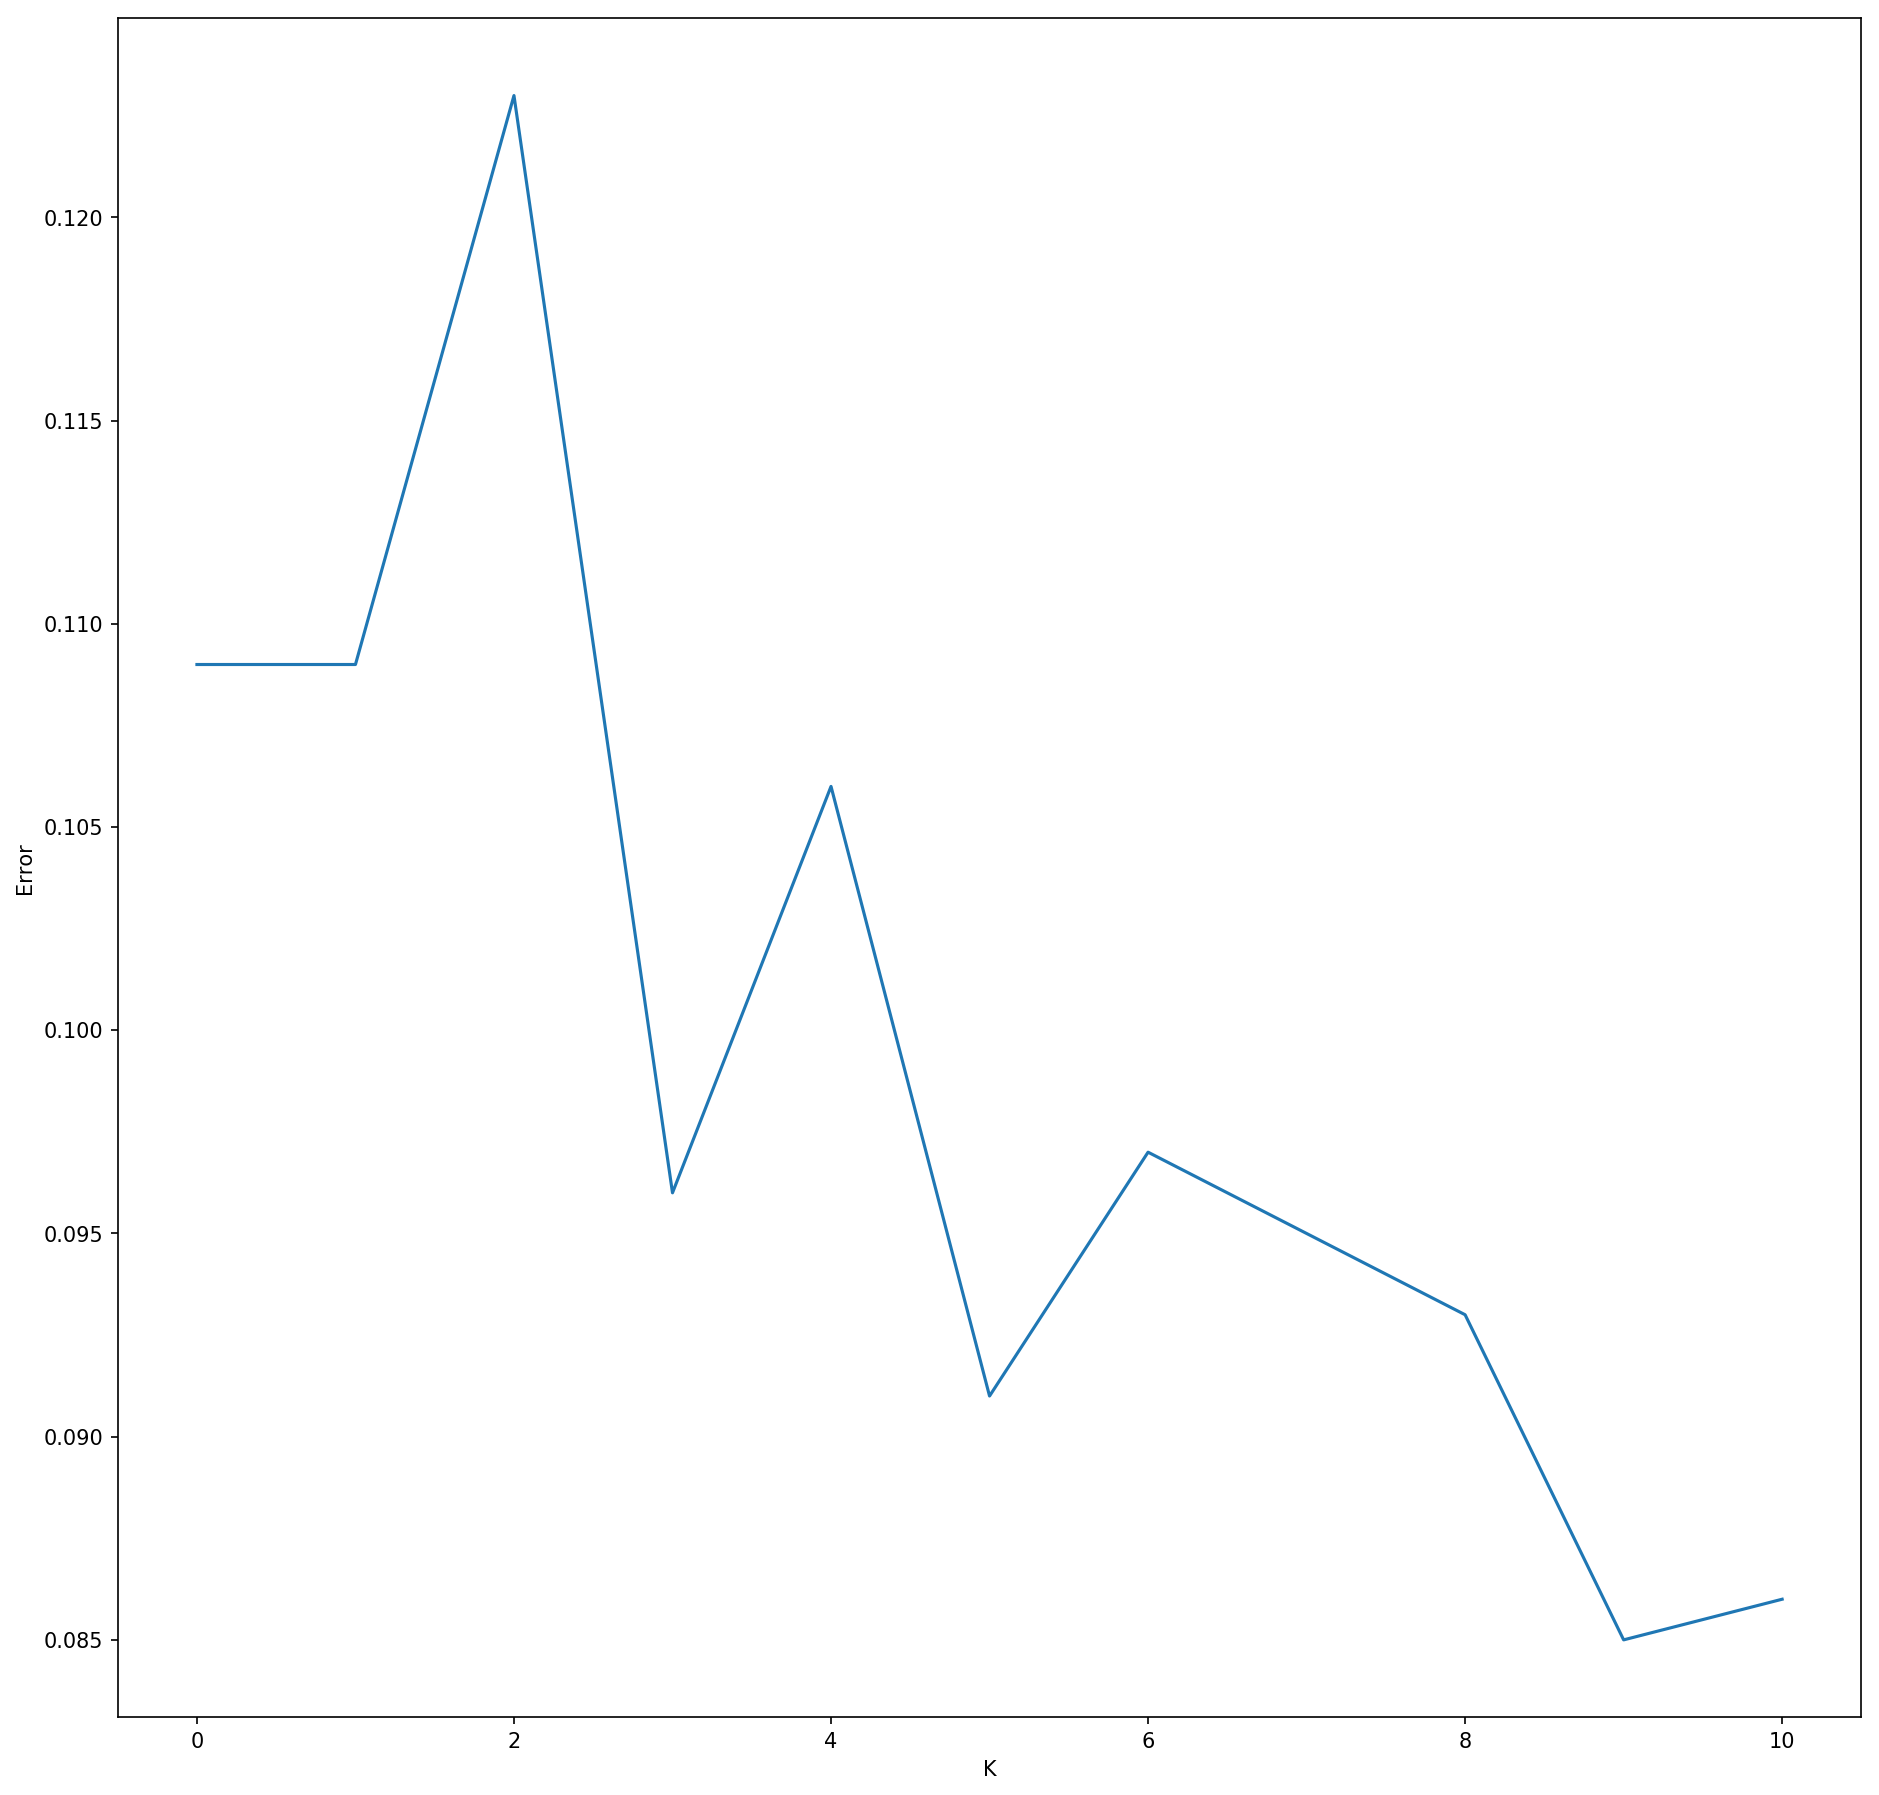

In [143]:
# error function to calculate erro based on indicator
def error(predict, results, k):
    s = 0
    for rvalue, pvalue in zip(results, predict[k - 1]):
        if (int(rvalue) != int(pvalue)):
            s = s + 1
    return (s / len(results))

# calculate error for all predict knn values
e = np.zeros(11)
for i in range(1, 11):
    e[i] = error(predict, label_t, i)
    print('Error for k =', i,' is', e[i])
    
plt.figure(figsize=(15, 15), dpi=150)

x = np.array(np.arange(0, 11., 1))
e[0] = e[1]
plt.plot(x, e)

plt.ylabel('Error')
plt.xlabel('K')
plt.show()

There is a noticable reduction in error when the value of k rises. This might be acceptable for small k values but with larger k as we notice in next few lines of code it is nither true nor logical, as it would cause consideration of other class teritories.
Overfitting means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very not accurate on untrained or new data. It is because this model is not generalized (or not AS generalized), meaning we can generalize the results and can’t make any inferences on other data, which is, ultimately, what we are trying to do. Basically, when this happens, the model learns or describes the “noise” in the training data instead of the actual relationships between variables in the data. This noise, obviously, isn’t part in of any new dataset, and cannot be applied to it.
In contrast to overfitting, when a model is underfitted, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data. This is usually the result of a very simple model (not enough predictors/independent variables).


In [153]:
# temp.clear()
# for t in data_t:
#         temp.append(knn(t, data, label, 50))
# predict.append(np.asarray(temp))
print('kvalue', 47, 'knn calculated')
print('Error for k = 47 is', error(predict, label_t, -3), 'and for k = 10 is', e[10])

kvalue 47 knn calculated
Error for k = 47 is 0.095 and for k = 10 is 0.086


For next question we must use two new functions. First one is **normdistance** instead of simple distsnce. This distance is calculated using **numpy linear algebra tools**, with the function called **norm**. Next one is **normknn** which takes another parameter called **p**. p is responsible for the norm number for example to calculate knn in a 3th norm we just need to pass p=3 to the function.

In [154]:
def normdistance(x1, x2, p):
    delta = x1 - x2
    return np.linalg.norm(delta, p)

def normknn(test, train, label, k, p):
    # finding number of trains
    m = train.shape[0]

    # compute distance from each point and store in dist
    dist = []
    for i in range(m):
        dist.append(normdistance(test, train[i], p))
    
    dist = np.asarray(dist)
    indx = np.argsort(dist)

    sorted_labels = label[indx][:k]
    counts = np.unique(sorted_labels, return_counts=True)
    return counts[0][np.argmax(counts[1])]

Now we need to fill the predict array with knn values that are calculated by the norms of 1 to 10. Therefore we perform two for loops to append temp which is filled with knn values to predict.

In [155]:
predict.clear()
temp.clear()

pvalues = range(1, 11)
for p in pvalues:
    for t in data_t:
        temp.append(normknn(t, data, label, 1, p))
    print('kvalue for p =', p, 'and k = 1 is calculated')
    predict.append(np.asarray(temp))

import sys
print('Prediction len:', predict.__len__(), file=sys.stderr)
print('KNN actual len:', predict[0].__len__(), file=sys.stderr)

kvalue for p = 1 and k = 1 is calculated
kvalue for p = 2 and k = 1 is calculated
kvalue for p = 3 and k = 1 is calculated
kvalue for p = 4 and k = 1 is calculated
kvalue for p = 5 and k = 1 is calculated
kvalue for p = 6 and k = 1 is calculated
kvalue for p = 7 and k = 1 is calculated
kvalue for p = 8 and k = 1 is calculated
kvalue for p = 9 and k = 1 is calculated
kvalue for p = 10 and k = 1 is calculated


Prediction len: 10
KNN actual len: 1000


As we may see there is not a considerable difference in error for different norms so it doesnt have a remarkable effects.

In [156]:
e = np.zeros(11)
for i in range(1, 11):
    e[i] = error(predict, label_t, i)
    print('Error for k =', i,' is', e[i])

Error for k = 1  is 0.112
Error for k = 2  is 0.112
Error for k = 3  is 0.112
Error for k = 4  is 0.112
Error for k = 5  is 0.112
Error for k = 6  is 0.112
Error for k = 7  is 0.112
Error for k = 8  is 0.112
Error for k = 9  is 0.112
Error for k = 10  is 0.112


In [157]:
for i, j in zip(predict[0], predict[8]):
    if (i != j):
        print(i, j)

## 5. Logistic regression implementation

### 5. Part A

In order to chose values for the parameters of logistic regression, we use maximum likelihood
estimation (MLE). As such we are going to have two steps: (1) write the log-likelihood function
and (2) find the values of θ that maximize the log-likelihood function.
The labels that we are predicting are binary, and the output of our logistic regression function is
supposed to be the probability that the label is one. This means that we can (and should) interpret
each label as a Bernoulli random variable: Y ∼ Ber(p).

<img src="derivative.jpg",width=600,height=600, align="left">


### 5. Part B
<img src="gfrom.png",width=600,height=600, align="left">


### 5. Part C
Logistic Regression is generally used for classification purposes. Unlike Linear Regression, the dependent variable can take a limited number of values only i.e, the dependent variable is categorical. When the number of possible outcomes is only two it is called Binary Logistic Regression.
We will use the well known Iris data set. It contains 3 classes of 50 instances each, where each class refers to a type of iris plant. To simplify things, we take just the first two feature columns. Also, the two non-linearly separable classes are labeled with the same category, ending up with a binary classification problem.

First we load the data using pandas. Data is loaded into iris variable. Then we drop the ID column ant take a look at the head and datatypes.

In [225]:
iris = pd.read_csv("Iris.csv") # load the dataset
iris.drop('Id', axis=1, inplace=True) # Drop id column

print(iris.dtypes)
iris.head()

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


As the problem demands, we need to drop the **Iris-versicolor** column and features related to that color. Next we must map class numbers to each target of iris dataset. Mapping is done assuming **Iris-setosa : 1** and **Iris-virginica : 0**. 

In [226]:
iris = iris[iris.Species != 'Iris-versicolor']
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [227]:
iris['Species'] = iris['Species'].map({'Iris-setosa': 1, 'Iris-virginica': 0})
iris = iris.rename(index=str, columns={'Species' : 'Class'})
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


According to the head info above we need to keep **SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm** columns of data as our **features** and **Class** as our **target**.
We then reshape our labels using the **ravel()** function to attain a rank 1 column vector. This will be required in order for python’s broadcasting to compute the correct values once we start calculating our linear algebra. We then pick four features from both train/test set which we will use to classify our labels and seperate the results of test and train using **train_test_split** function in model_selection of sklearn.

Shape of train data: (80, 4) (80,)


Number of tests is 20 Number of trains is 80


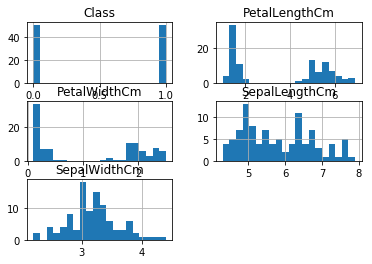

In [315]:
from sklearn.model_selection import train_test_split

iris.hist(bins=20)
X_iris = iris.values[:, [0, 1, 2, 3]]
y_iris = iris.values[:, [4]]
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris.ravel(), test_size=0.2, random_state=42)

print('Shape of train data:', X_iris_train.shape, y_iris_train.shape)
print('Number of tests is', len(X_iris_test), 'Number of trains is', len(X_iris_train), file=sys.stderr)

We then create a class named **MLLogisticRegression** which contains all the required functions to calculate the logistic regression model and predict the results. Generalized linear models usually tranform a linear model of the predictors by using a link function. In logistic regression, the link function is the sigmoid. We can implement this really easily as it is done in **sigmoid** function.
MLLogisticRegression has two main vaiables called **lr : learning rate** and **num_iteration : number of iterations** which has two default values of 0.01 and 100000.
The **log-likelihood** can be viewed as a sum over all the training data. The log-likelihood function is typically used to derive the maximum likelihood estimator of the parameter . The estimator is obtained by solving that is, by finding the parameter that maximizes the log-likelihood of the observed sample .


In [380]:
class MLLogisticRegression:
    # class initiaion with learning rate and number of iterations
    def __init__(self, lr=0.01, num_iter=100000):
        self.lr = lr
        self.num_iter = num_iter
    
    # adding interception to gain more accuracy
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    # defining sigmoid function
    def sigmoid(self, expval):
        return 1 / (1 + np.exp(-expval))

    # defining loss function
    def loglikelihood(self, z, y):
        return np.sum(y * z - np.log(1 + np.exp(z)))
    
    # fit the model to the training data
    def fit(self, X, y):
        # add interception
        X = self.add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (y - h)) / y.size
            self.theta += self.lr * gradient
            
            if(i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.sigmoid(z)
                print(f'likelihood: {self.loglikelihood(z, y)} \t')
    
    def predict_prob(self, X):
        X = self.add_intercept(X)
        return self.sigmoid(np.dot(X, self.theta))
    
    # prediction
    def predict(self, X, threshold = 0.5):
        return (self.predict_prob(X) >= threshold)

MLLogisticRegression class with lr=5e-5 and num_iter= 300000 is created and we feed the training set into the model. Performing prediction on test data and comparing it to real test target results we measure the accuracy. Then a sklearn Logistic regression model is created and the results are compared which yeilds accuracy=1 for both cases. Values of likelihood function are printed in each 10000 steps.

In [381]:
trainmodel = MLLogisticRegression(lr=5e-5, num_iter=300000)
trainmodel.fit(X_iris_train, y_iris_train)
preds = trainmodel.predict(X_iris_test)

from sklearn.metrics import accuracy_score
print('\nAccuracy of designed logistic regression model is', accuracy_score(y_iris_test, preds), file=sys.stderr)
print('Data test:\n', y_iris_test, '\nPrediction:\n', preds)

likelihood: -55.4446084194882 	
likelihood: -32.9425751177603 	
likelihood: -22.880372685623495 	
likelihood: -17.18653876799968 	
likelihood: -13.636416533502604 	
likelihood: -11.24841124926888 	
likelihood: -9.546681506218814 	
likelihood: -8.278982762654584 	
likelihood: -7.3011799053510575 	
likelihood: -6.525689691612115 	
likelihood: -5.896536888185462 	
likelihood: -5.3764185327263245 	
likelihood: -4.939587577329028 	
likelihood: -4.567736356580061 	
likelihood: -4.247510802449099 	
likelihood: -3.968952749409164 	
likelihood: -3.724491885517751 	
likelihood: -3.5082747494607904 	
likelihood: -3.315706834142644 	
likelihood: -3.1431331387689307 	
likelihood: -2.9876108682837796 	
likelihood: -2.8467448075384256 	
likelihood: -2.7185661650730975 	
likelihood: -2.6014421043215057 	
likelihood: -2.494007289923583 	
likelihood: -2.3951114613378004 	
likelihood: -2.303778832701035 	
likelihood: -2.219176327796564 	
likelihood: -2.1405884913786934 	
likelihood: -2.067397499211388 	



Accuracy of designed logistic regression model is 1.0


In [373]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', fit_intercept=True, C = 1e15)
clf.fit(X_iris_train, y_iris_train)
clf.predict(X_iris_test)
print('LogisticRegression of Scikitlearn', clf.score(X_iris_train, y_iris_train), file=sys.stderr)

LogisticRegression of Scikitlearn 1.0


### 5. Part D
Results of different learning rates are shown in next few examples. As it can be seen very small values and very large values both end up with wrong and inaccurate results. Learning rate is a hyper-parameter that controls how much we are adjusting the weights of our network with respect the likelihood gradient. The lower the value, the slower we travel along the downward slope. While this might be a good idea (using a low learning rate) in terms of making sure that we do not miss any local minima, it could also mean that we’ll be taking a long time to converge.
Furthermore, the learning rate affects how quickly our model can converge to a local minimum (aka arrive at the best accuracy). Thus getting it right from the get go would mean lesser time for us to train the model.


In [382]:
trainmodel = MLLogisticRegression(lr=5e-3, num_iter=300000)
trainmodel.fit(X_iris_train, y_iris_train)
preds = trainmodel.predict(X_iris_test)

from sklearn.metrics import accuracy_score
print('Accuracy of designed logistic regression model is', accuracy_score(y_iris_test, preds), file=sys.stderr)
print('Data test:\n', y_iris_test, '\nPrediction:\n', preds)

likelihood: -54.7529404209332 	
likelihood: -0.6084273977581887 	
likelihood: -0.30843854931521697 	
likelihood: -0.2075892022570532 	
likelihood: -0.15682365078192984 	
likelihood: -0.12619536723983313 	
likelihood: -0.10568060782784074 	
likelihood: -0.09096753735312892 	
likelihood: -0.0798930707471391 	
likelihood: -0.07125188398585544 	
likelihood: -0.06431880265166443 	
likelihood: -0.05863119189753789 	
likelihood: -0.053879911729853056 	
likelihood: -0.04985047977758755 	
likelihood: -0.04638938512400044 	
likelihood: -0.04338383988763107 	
likelihood: -0.04074910224981373 	
likelihood: -0.03842026037856097 	
likelihood: -0.03634674659073676 	
likelihood: -0.03448857836799501 	
likelihood: -0.032813723377428876 	
likelihood: -0.03129621481896079 	
likelihood: -0.029914779007273046 	
likelihood: -0.02865181972443617 	
likelihood: -0.027492655580861964 	
likelihood: -0.02642493974772508 	
likelihood: -0.025438213105756936 	
likelihood: -0.024523556324771986 	
likelihood: -0.02367

Accuracy of designed logistic regression model is 1.0


In [383]:
trainmodel = MLLogisticRegression(lr=5e-1, num_iter=300000)
trainmodel.fit(X_iris_train, y_iris_train)
preds = trainmodel.predict(X_iris_test)

from sklearn.metrics import accuracy_score
print('Accuracy of designed logistic regression model is', accuracy_score(y_iris_test, preds), file=sys.stderr)
print('Data test:\n', y_iris_test, '\nPrediction:\n', preds)

likelihood: -88.69029464934175 	
likelihood: -0.006878497470181735 	
likelihood: -0.003513498059195268 	
likelihood: -0.0023710075615005696 	
likelihood: -0.0017934322460829402 	
likelihood: -0.0014441245635475508 	
likelihood: -0.0012098007895711745 	
likelihood: -0.0010415696540093274 	
likelihood: -0.0009148484188082852 	
likelihood: -0.0008159160847478693 	
likelihood: -0.0007365069468106895 	
likelihood: -0.000671342459402207 	
likelihood: -0.0006168925367171375 	
likelihood: -0.0005707063509526303 	
likelihood: -0.0005310287965120105 	
likelihood: -0.0004965697500153362 	
likelihood: -0.0004663595032581609 	
likelihood: -0.0004396550080503147 	
likelihood: -0.0004158772415147801 	
likelihood: -0.00039456826701494947 	
likelihood: -0.0003753611215076561 	
likelihood: -0.00035795826977231 	
likelihood: -0.0003421159089912197 	
likelihood: -0.00032763235005245546 	
likelihood: -0.00031433929087274577 	
likelihood: -0.00030209517475379905 	
likelihood: -0.0002907800747522032 	
likeli

Accuracy of designed logistic regression model is 1.0


In [384]:
trainmodel = MLLogisticRegression(lr=10, num_iter=300000)
trainmodel.fit(X_iris_train, y_iris_train)
preds = trainmodel.predict(X_iris_test)

from sklearn.metrics import accuracy_score
print('Accuracy of designed logistic regression model is', accuracy_score(y_iris_test, preds), file=sys.stderr)
print('Data test:\n', y_iris_test, '\nPrediction:\n', preds)

likelihood: -1690.8681249999995 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
likelihood: 0.0 	
Data test:
 [0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1.] 
Prediction:
 [False False False  True  True  True  True False  True  True  True  True
 False  True False  True False False  True  True]


Accuracy of designed logistic regression model is 1.0


In [385]:
trainmodel = MLLogisticRegression(lr=1e-8, num_iter=300000)
trainmodel.fit(X_iris_train, y_iris_train)
preds = trainmodel.predict(X_iris_test)

from sklearn.metrics import accuracy_score
print('Accuracy of designed logistic regression model is', accuracy_score(y_iris_test, preds), file=sys.stderr)
print('Data test:\n', y_iris_test, '\nPrediction:\n', preds)

likelihood: -55.45177301123164 	
likelihood: -55.437451718162464 	
likelihood: -55.42315905743675 	
likelihood: -55.40889494155897 	
likelihood: -55.394659283292796 	
likelihood: -55.38045199566048 	
likelihood: -55.36627299194221 	
likelihood: -55.35212218567555 	
likelihood: -55.33799949065477 	
likelihood: -55.32390482093025 	
likelihood: -55.30983809080785 	
likelihood: -55.29579921484832 	
likelihood: -55.28178810786666 	
likelihood: -55.267804684931505 	
likelihood: -55.25384886136453 	
likelihood: -55.239920552739804 	
likelihood: -55.22601967488321 	
likelihood: -55.21214614387179 	
likelihood: -55.19829987603316 	
likelihood: -55.1844807879449 	
likelihood: -55.17068879643389 	
likelihood: -55.1569238185758 	
likelihood: -55.14318577169434 	
likelihood: -55.12947457336077 	
likelihood: -55.11579014139319 	
likelihood: -55.102132393856024 	
likelihood: -55.08850124905932 	
likelihood: -55.074896625558196 	
likelihood: -55.06131844215221 	
likelihood: -55.04776661788475 	
Data t

Accuracy of designed logistic regression model is 0.4


## 6. Kaggle spam detection

Importing neccessary libraries is the first step. We need to add pandas to manipulate and read csv data.

In [2]:
# linear algebra
import numpy as np
# data processing
import pandas as pd
# output error
import sys
# plotting graphs
import matplotlib.pyplot as plt
# Creating numeric features from text messages
from sklearn.feature_extraction.text import CountVectorizer
# split train and test datasets
from sklearn.model_selection import train_test_split
# knn calculations
from sklearn.neighbors import KNeighborsClassifier
# error calculation
from sklearn import metrics

We read the data into data variable and print the head of data. We also print abstract value statistics. It is noticed that we have 4360 none-spam and 1368 spam emails.

In [3]:
data = pd.read_csv("emails.csv", encoding= "latin-1")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
data.spam.value_counts()

0    4360
1    1368
Name: spam, dtype: int64

Next we should try to split test and train data using scikitlearn **train_test_split** module. This splits arrays or matrices into random train and test subsets and return them into lists we have assigned to in the left hand side.

In [4]:
message_train, message_test, spam_train, spam_test = train_test_split(data["text"], data["spam"], test_size=0.2, random_state=10)
print('X Train Len:', len(message_train))
print('X Test  Len:', len(message_test))
print('-------------------')
print('Total Samples:', len(message_train) + len(message_test))

X Train Len: 4582
X Test  Len: 1146
-------------------
Total Samples: 5728


We check for one of the train datas to make sure about the correctness of above operation.

In [6]:
print(message_train[5])
print('Spam Status:', spam_train[5], file=sys.stderr)

Subject: great nnews  hello , welcome to medzonline sh groundsel op  we are pleased to introduce ourselves as one of the ieading online phar felicitation maceuticai shops .  helter v  shakedown r  a cosmopolitan l  l blister l  l bestow ag  ac tosher l  is coadjutor va  confidant um  andmanyother .  - sav inexpiable e over 75 %  - total confide leisure ntiaiity  - worldwide s polite hlpplng  - ov allusion er 5 miilion customers in 150 countries  have devitalize a nice day !


Spam Status: 1


The text must be parsed to remove words, called tokenization. Then the words need to be encoded as integers or floating point values for use as input to a machine learning algorithm, called feature extraction (or vectorization). The scikit-learn library offers easy-to-use tools to perform both tokenization and feature extraction of your text data.
A simple and effective model for thinking about text documents in machine learning is called the Bag-of-Words Model, or BoW.

The model is simple in that it throws away all of the order information in the words and focuses on the occurrence of words in a document. This can be done by assigning each word a unique number. Then any document we see can be encoded as a fixed-length vector with the length of the vocabulary of known words. The value in each position in the vector could be filled with a count or frequency of each word in the encoded document. This is the bag of words model, where we are only concerned with encoding schemes that represent what words are present or the degree to which they are present in encoded documents without any information about order. There are many ways to extend this simple method, both by better clarifying what a “word” is and in defining what to encode about each word in the vector.

We need to convert text messages to feature vectors. Using **CountVectorizer** is requiered to accomplish the task. CountVectorizer counts all the words and represent the result as vector array or matrix. For stop word parameter, if ‘english’, a built-in stop word list for English is used. 
Stop words are <font color='red'>words like “and”, “the”, “him”, which are presumed to be uninformative</font> in representing the content of a text, and which may be removed to avoid them being construed as signal for prediction. Sometimes, however, similar words are useful for prediction, such as in classifying writing style or personality.

In [7]:
cv = CountVectorizer(stop_words="english")
cv.fit(message_train)
print('Total number of vocabulary elements is', len(cv.vocabulary_))

Total number of vocabulary elements is 32938


The vectors returned from a call to **transform()** will be sparse vectors, and we may transform them back to numpy arrays to look and better understand what is going on by calling the **toarray()** function.
The sparse matrix is represented using three one-dimensional arrays for the non-zero values, the extents of the rows, and the column indexes. Compressed Sparse Column. The same as the Compressed Sparse Row method except the column indices are compressed and read first before the row indices.
When a sparse matrix is represented with 2-dimensional array, we waste lot of space to represent that matrix. For example, consider a matrix of size 100 X 100 containing only 10 non-zero elements.

In [8]:
message_train_df = cv.transform(message_train)
message_test_df = cv.transform(message_test)
print(type(message_test_df))
print('Train shape is:', message_train_df.shape, 'Test shape is:', message_test_df.shape)
print(message_train_df.toarray(), file=sys.stderr)

<class 'scipy.sparse.csr.csr_matrix'>
Train shape is: (4582, 32938) Test shape is: (1146, 32938)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


We can then see that the encoded vector is a sparse matrix. Finally, we can see an array version of the encoded vector showing a count of occurrence for each word except the stop words. To measure the distance between points A and B in a feature space, various distance functions have been used in the literature, in which the Euclidean distance function is the most widely used one and default of sklearn lilbrary.

Finally, we try to use a knn model with default metric which is Euclidean. also a list of all available metrics is available below.

In [9]:
from sklearn.neighbors import VALID_METRICS
VALID_METRICS['brute']

['cityblock',
 'cosine',
 'euclidean',
 'l2',
 'l1',
 'manhattan',
 'precomputed',
 'braycurtis',
 'canberra',
 'chebyshev',
 'correlation',
 'cosine',
 'dice',
 'hamming',
 'jaccard',
 'kulsinski',
 'mahalanobis',
 'matching',
 'minkowski',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'yule',
 'wminkowski']

**knn_evaluation** function, as it is obvious from its name, is used to evaluate each knn model. It performs the following steps:
    * create a range called kvalues
    * create a list called e and make sure about its values
    * perform a for loop on all kvalues to fined the score for each model and append it to e
    * find the maximum of e
    * plot the figure showing score results

In [13]:
# function gets input and evaluates knn model
def knn_evaluation(message_train_df, message_test_df, spam_train, spam_test, m):
    kvalues = range(1, 30)

    e = []
    e.clear()

    for k in kvalues:
        knn = KNeighborsClassifier(n_neighbors=k, metric=m)
        knn.fit(message_train_df, spam_train)
        spam_predict = knn.predict(message_test_df)
        e.append(metrics.accuracy_score(spam_test, spam_predict))

    m = max(e)
    print('Maximum score in knn is:', m, 'For K =', [i + 1 for i, j in enumerate(e) if j == m], file=sys.stderr)

    error = np.asarray(e)
    plt.figure(figsize=(15, 15), dpi=150)

    x = np.array(np.arange(1, len(error) + 1, 1))

    plt.plot(x, error)

    # plotting data
    plt.ylabel('Calculated Score using Euclidean Distance')
    plt.xlabel('K value')
    plt.show()

Maximum score in knn is: 0.9118673647469459 For K = [3]


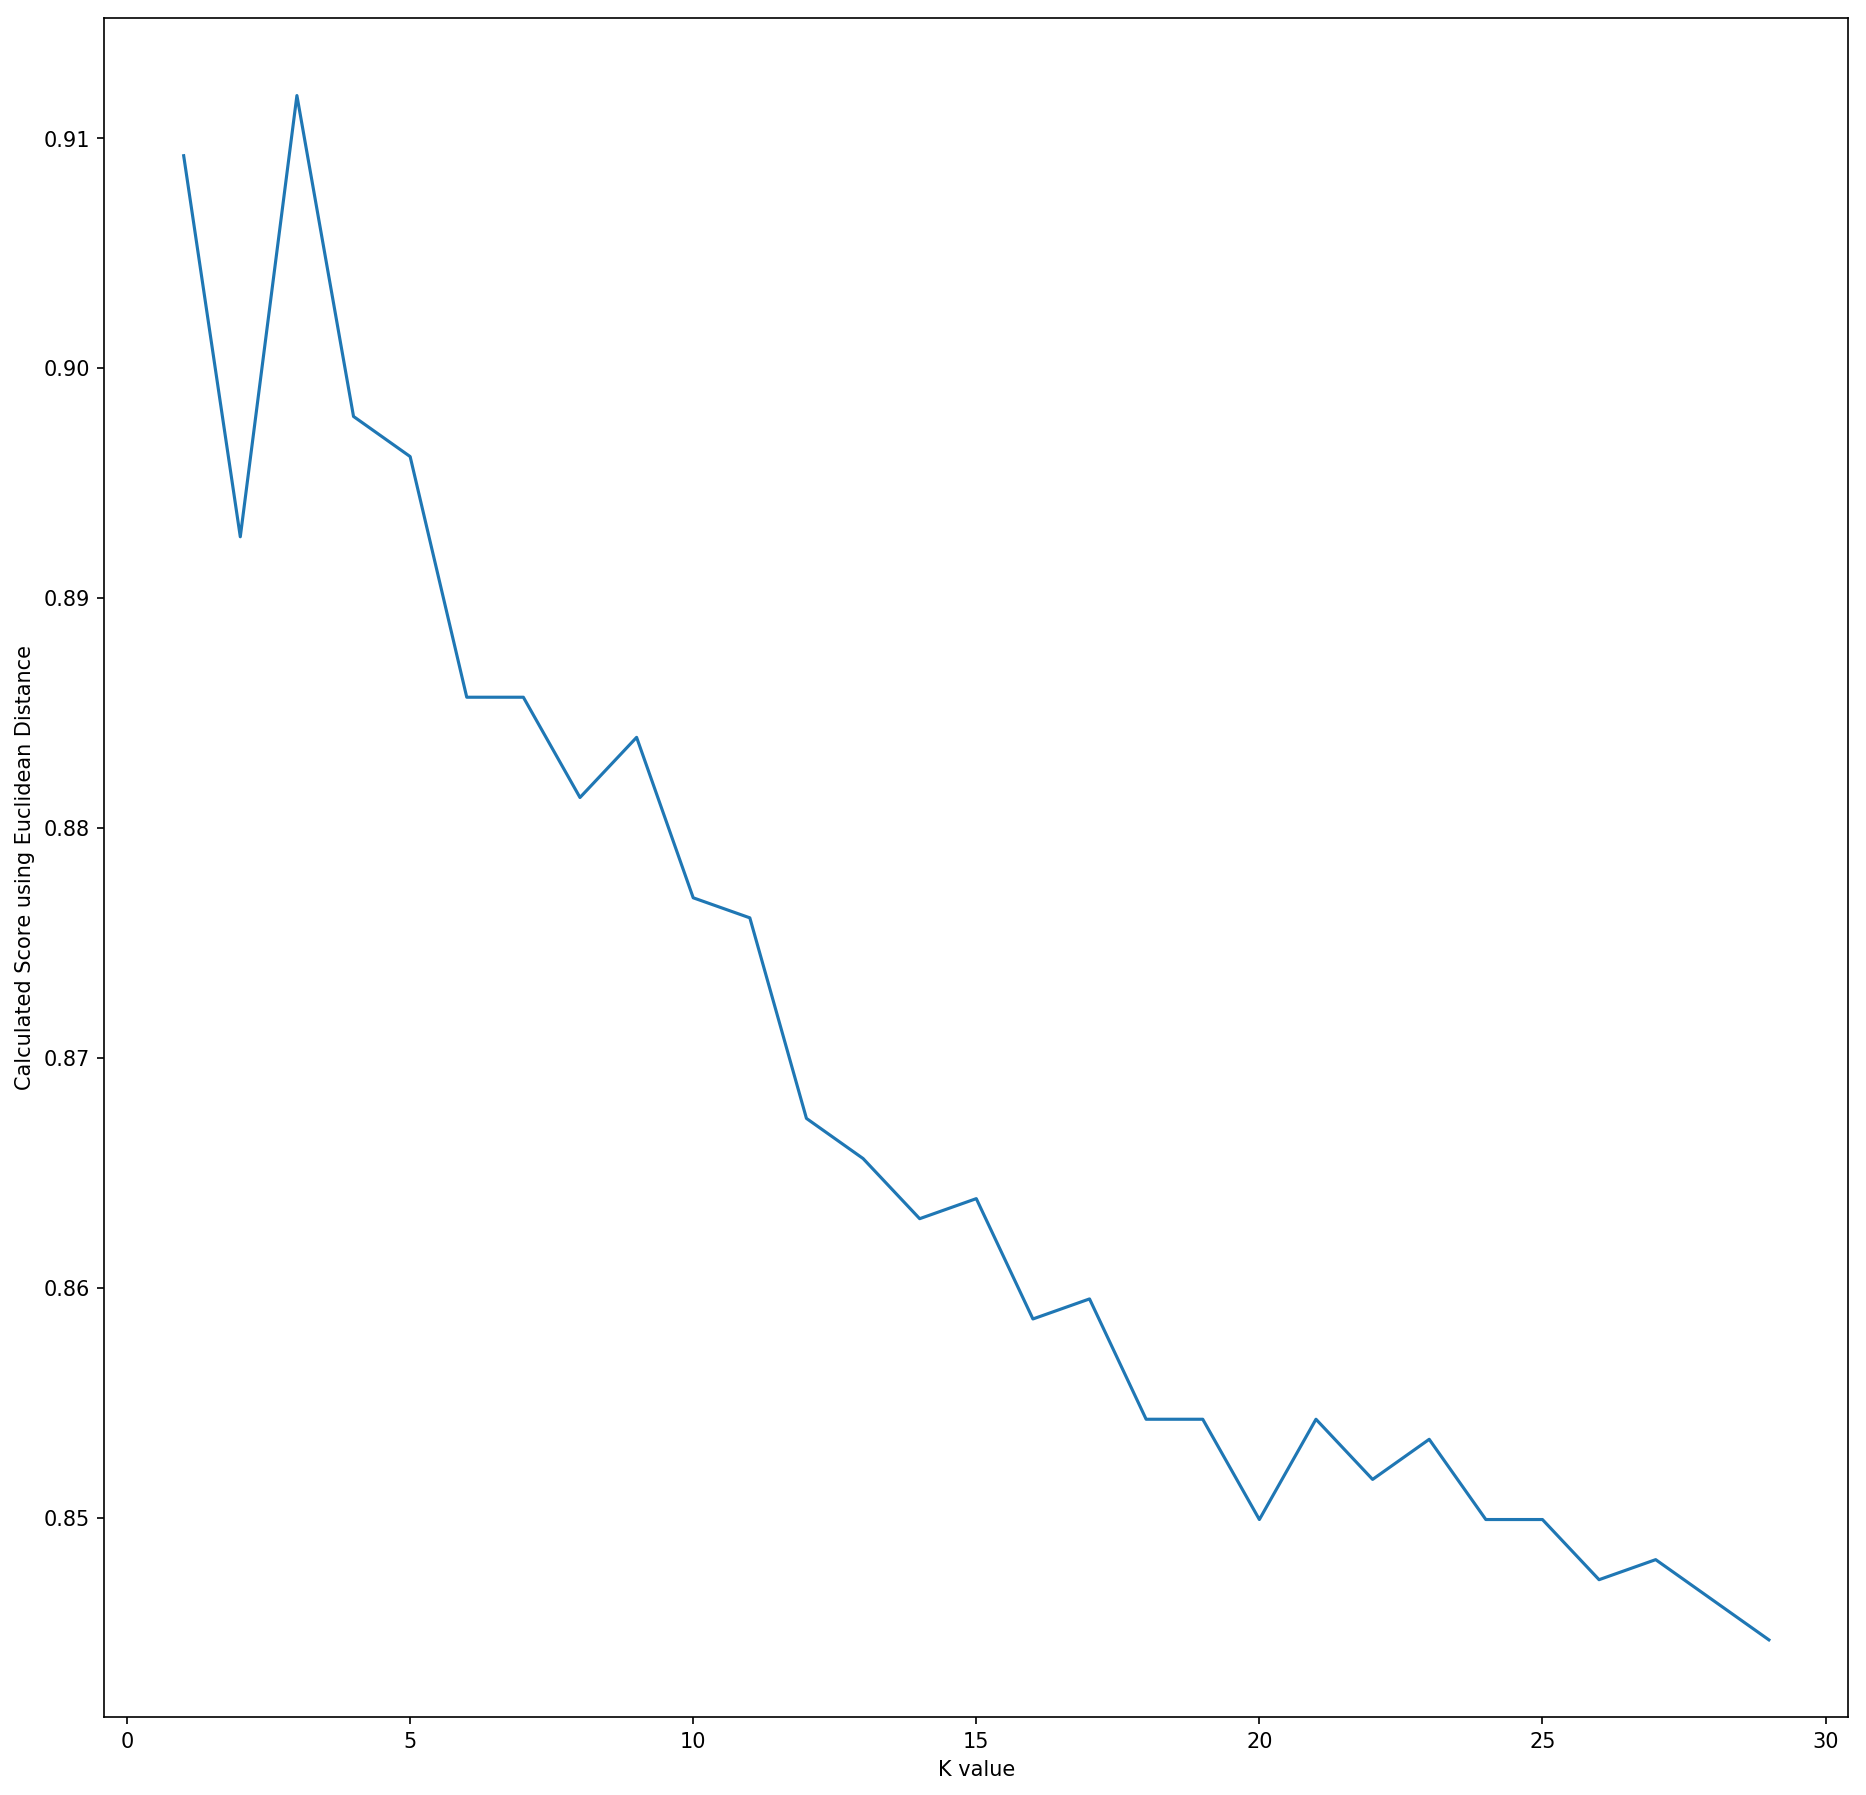

In [36]:
knn_evaluation(message_train_df, message_test_df, spam_train, spam_test, 'euclidean')

We have found the best score which is 0.912 in k = 3. As the diagram implies, score values after k = 3 are decreasing so the best score is necessarily related to k = 3.

We should try with another metric like cosine metric. Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. The cosine similarity is particularly used in positive space, where the outcome is neatly bounded in 

Maximum score in knn is: 0.9860383944153578 For K = [1]


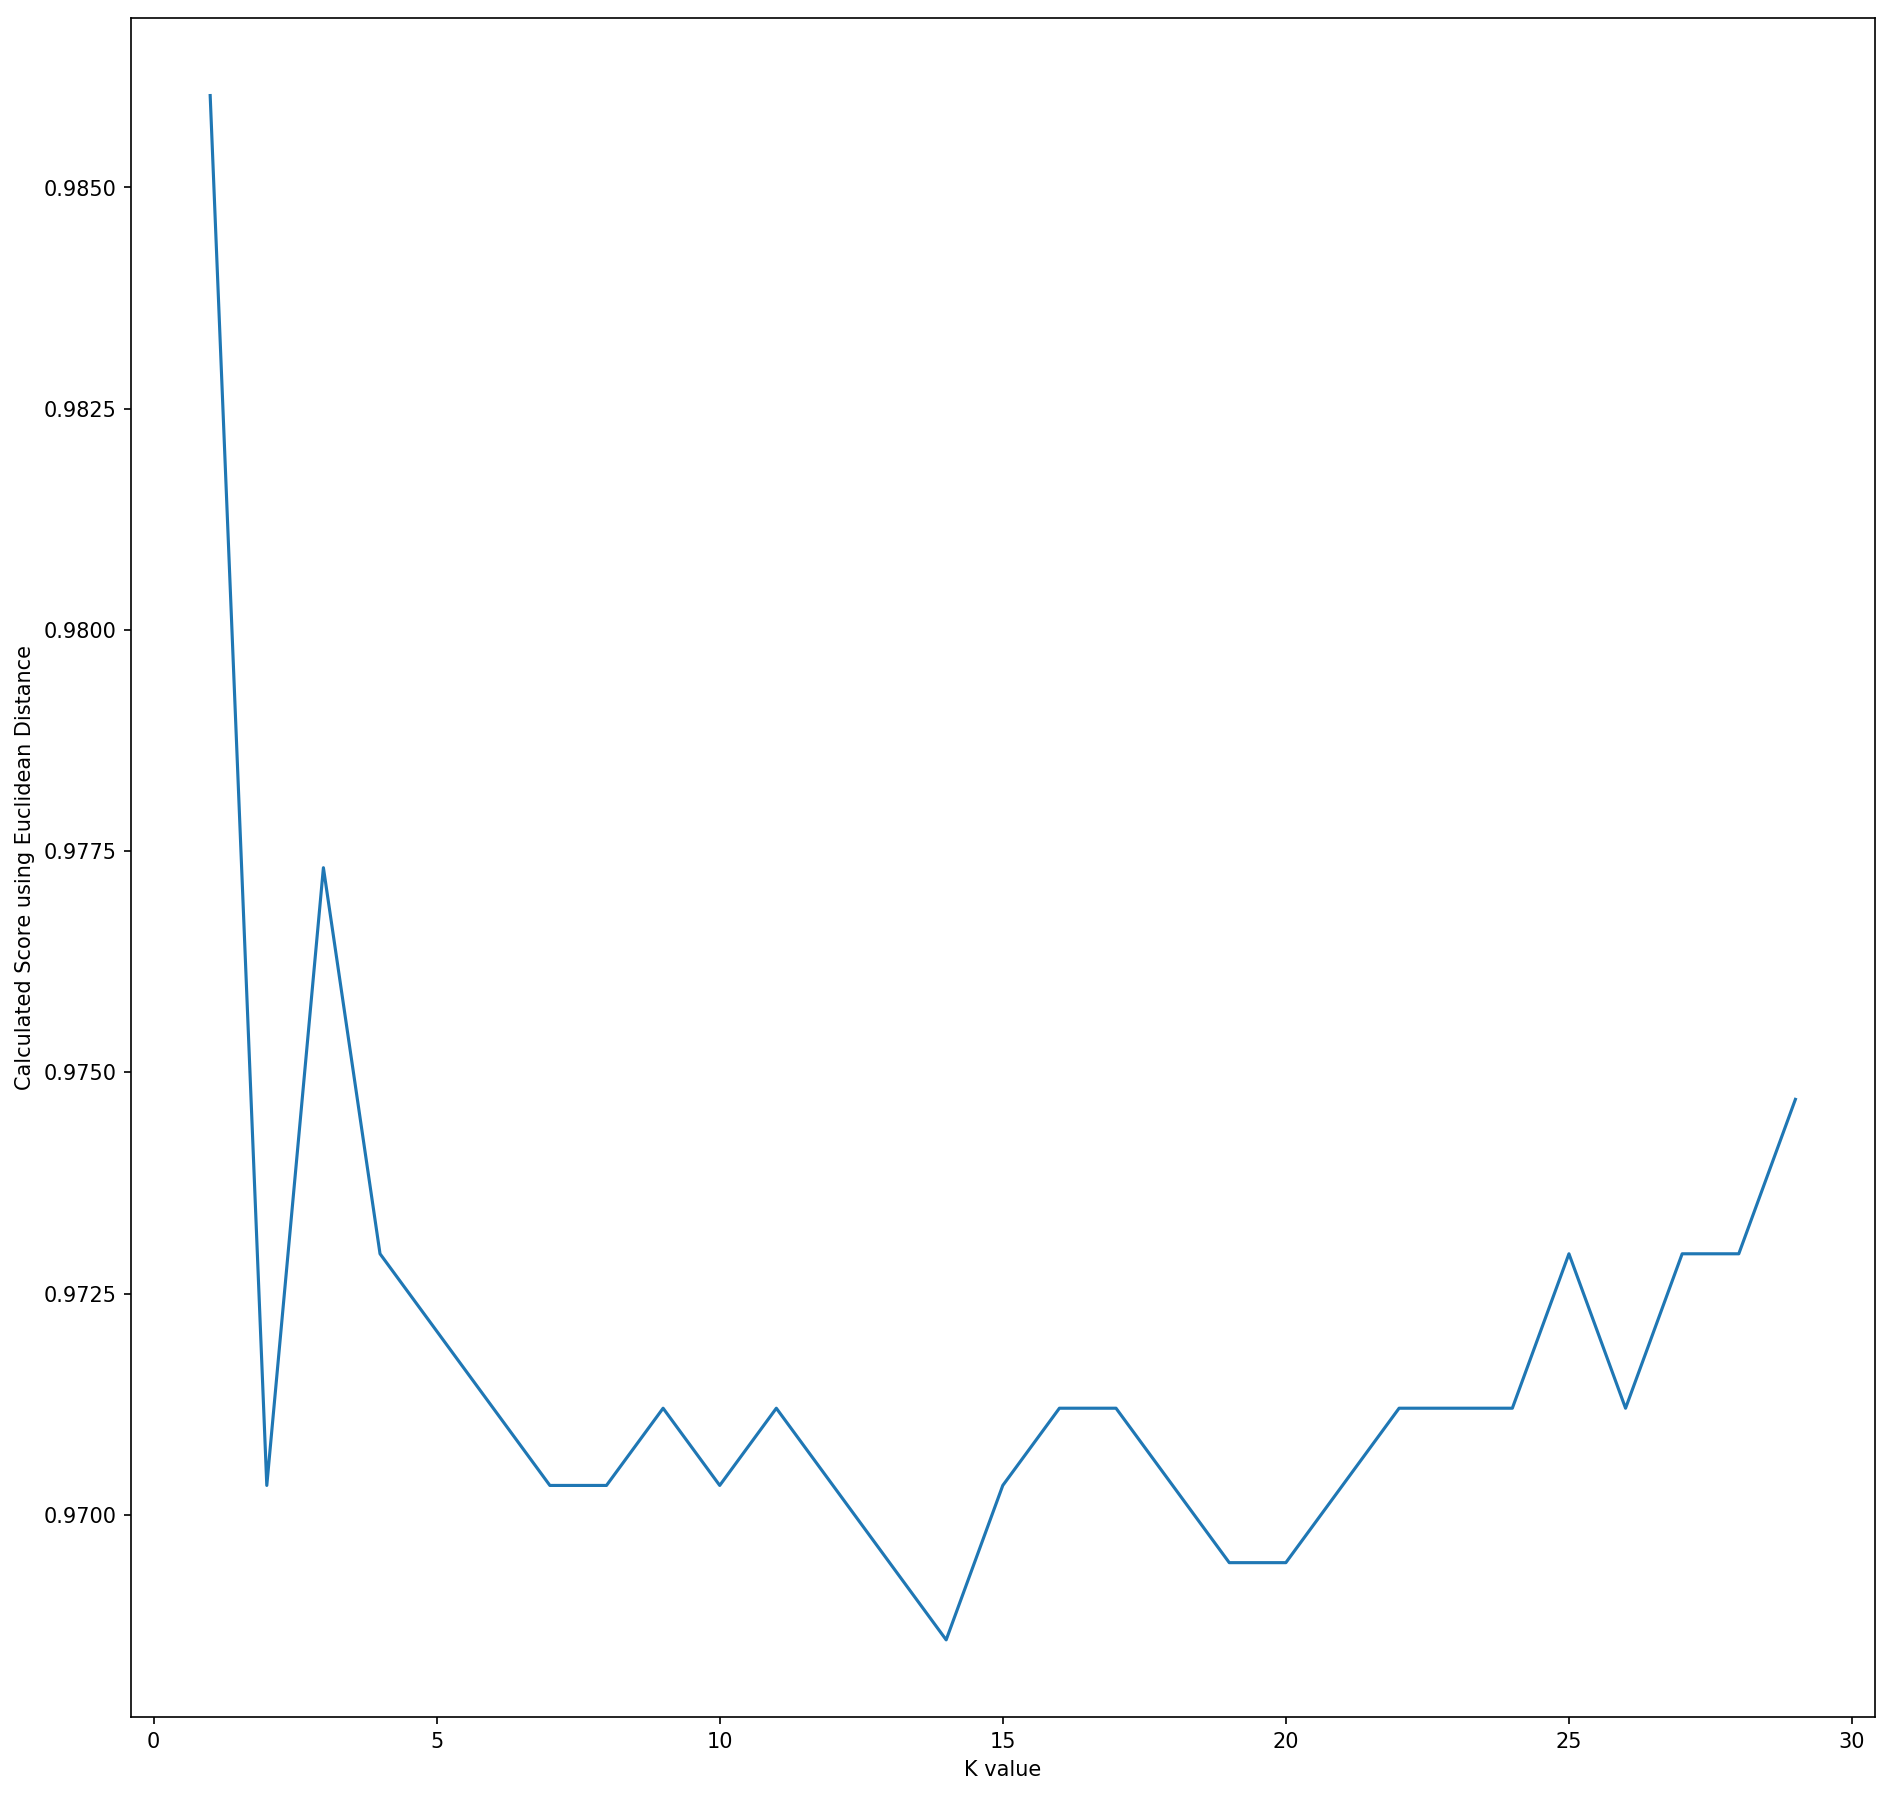

In [37]:
knn_evaluation(message_train_df, message_test_df, spam_train, spam_test, 'cosine')

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes method is more accurate on these sort of problems so i decided to test it as well.
The **multinomial Naive Bayes classifier** is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

bmodel = MultinomialNB(alpha=1.8)
bmodel.fit(message_train_df,spam_train)
bpred = bmodel.predict(message_test_df)

print('Accuracy of naive bayes model is:', accuracy_score(spam_test, bpred), file=sys.stderr)

Accuracy of naive bayes model is: 0.9947643979057592
